In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("cleaned_loan_data.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,0.070489,0.000000,0.172214,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,0.054830,0.036192,0.172214,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,0.035250,0.000000,0.082489,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,0.030093,0.056592,0.160637,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,0.072356,0.000000,0.191027,360.0,1.0,Urban,Y


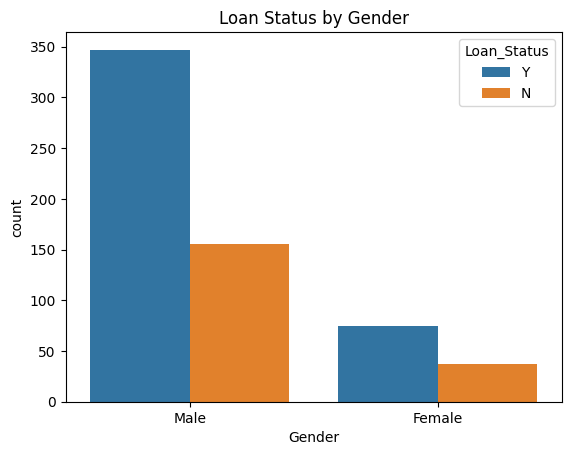

In [3]:
sns.countplot(data=df, x='Gender', hue='Loan_Status')
plt.title("Loan Status by Gender")
plt.show()

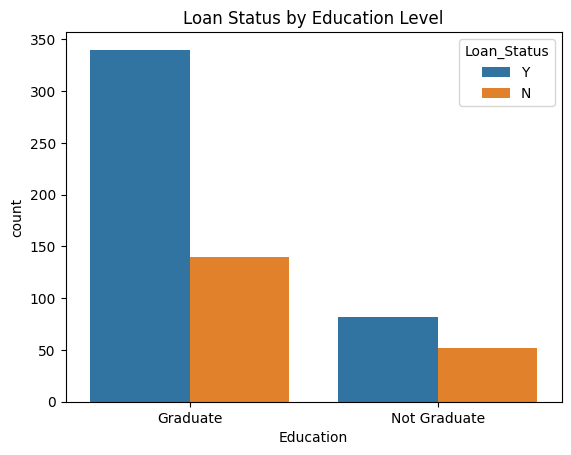

In [4]:
sns.countplot(data=df, x='Education', hue='Loan_Status')
plt.title("Loan Status by Education Level")
plt.show()

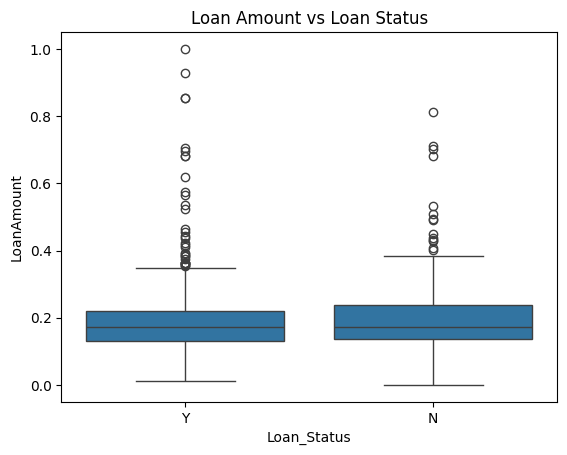

In [5]:
sns.boxplot(data=df, x='Loan_Status', y='LoanAmount')
plt.title("Loan Amount vs Loan Status")
plt.show()

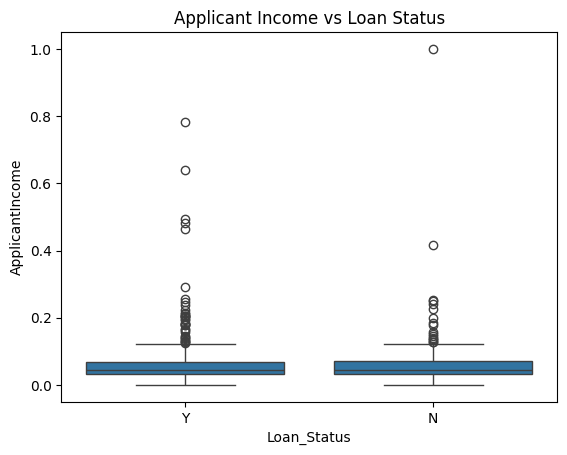

In [6]:
sns.boxplot(data=df, x='Loan_Status', y='ApplicantIncome')
plt.title("Applicant Income vs Loan Status")
plt.show()

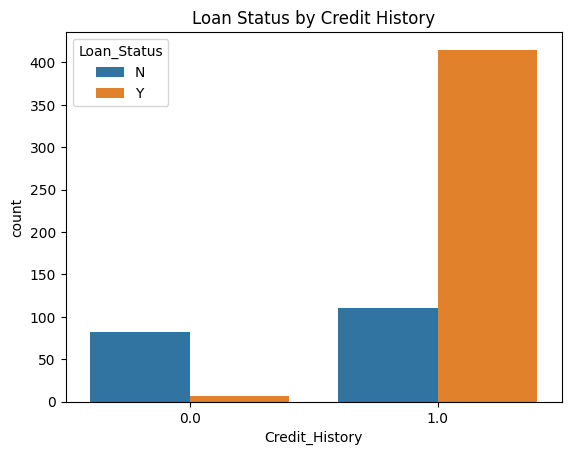

In [7]:
sns.countplot(data=df, x='Credit_History', hue='Loan_Status')
plt.title("Loan Status by Credit History")
plt.show()

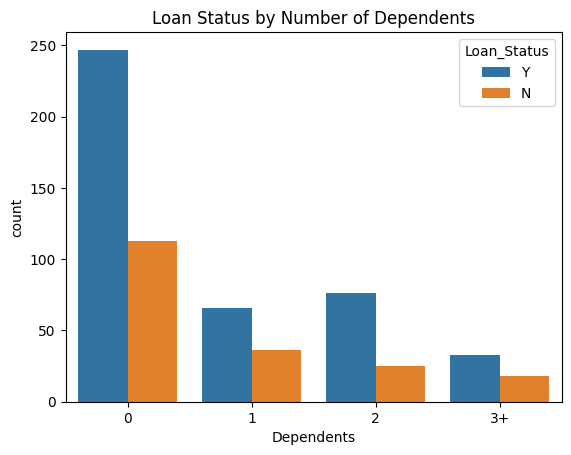

In [8]:
sns.countplot(data=df, x='Dependents', hue='Loan_Status')
plt.title("Loan Status by Number of Dependents")
plt.show()

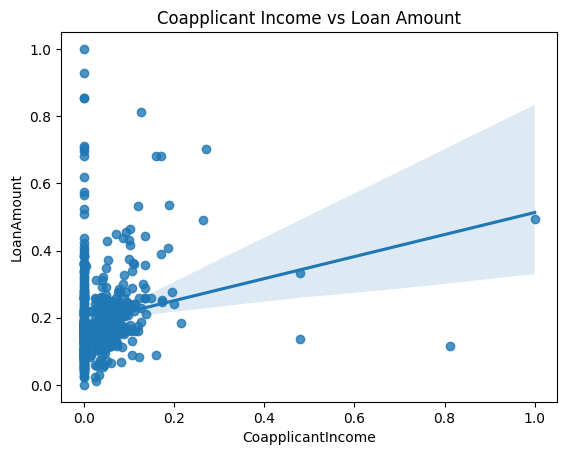

In [9]:
sns.regplot(data=df, x='CoapplicantIncome', y='LoanAmount')
plt.title("Coapplicant Income vs Loan Amount")
plt.show()

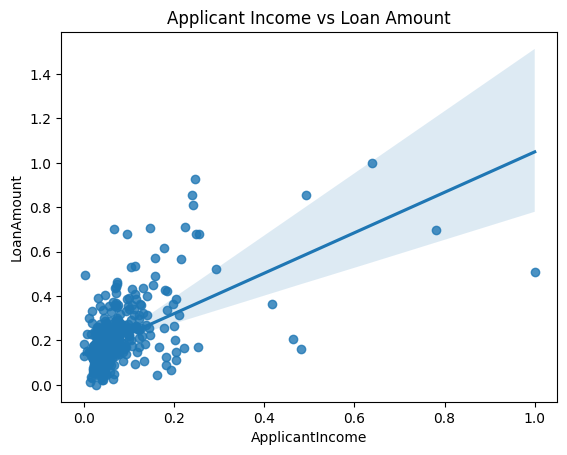

In [10]:
sns.regplot(data=df, x='ApplicantIncome', y='LoanAmount')
plt.title("Applicant Income vs Loan Amount")
plt.show()

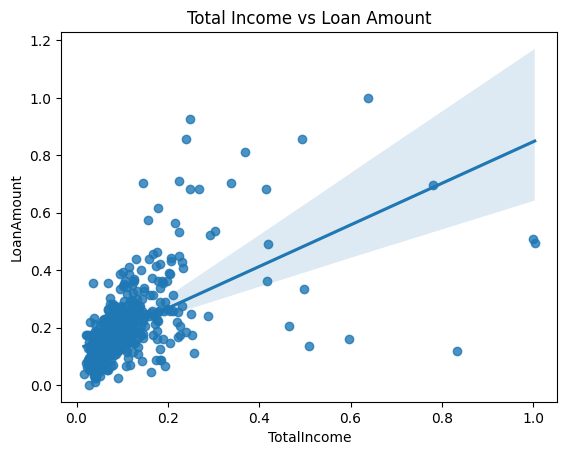

In [11]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
sns.regplot(data=df, x='TotalIncome', y='LoanAmount')
plt.title("Total Income vs Loan Amount")
plt.show()

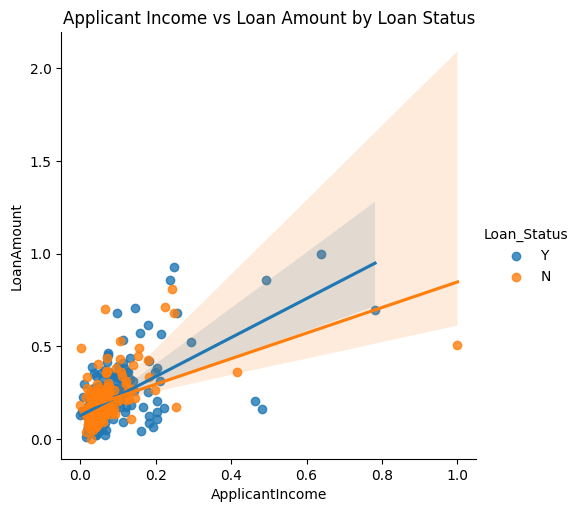

In [12]:
sns.lmplot(data=df, x='ApplicantIncome', y='LoanAmount', hue='Loan_Status')
plt.title("Applicant Income vs Loan Amount by Loan Status")
plt.show()

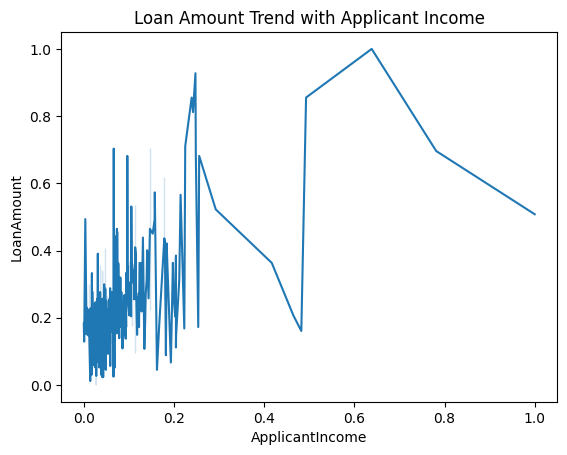

In [13]:
df_sorted = df.sort_values('ApplicantIncome')
sns.lineplot(data=df_sorted, x='ApplicantIncome', y='LoanAmount')
plt.title("Loan Amount Trend with Applicant Income")
plt.show()

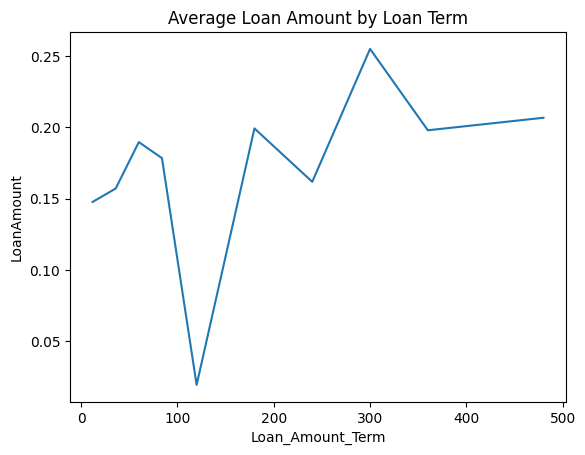

In [14]:
sns.lineplot(
    data=df.groupby('Loan_Amount_Term', as_index=False)['LoanAmount'].mean(),
    x='Loan_Amount_Term', y='LoanAmount'
)
plt.title("Average Loan Amount by Loan Term")
plt.show()

C:\Users\AAKASH\AppData\Local\Temp\ipykernel_16356\3598878506.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  approval_rate = df.groupby(income_bins)['Loan_Status'].apply(lambda x: (x=='Y').mean()).reset_index()


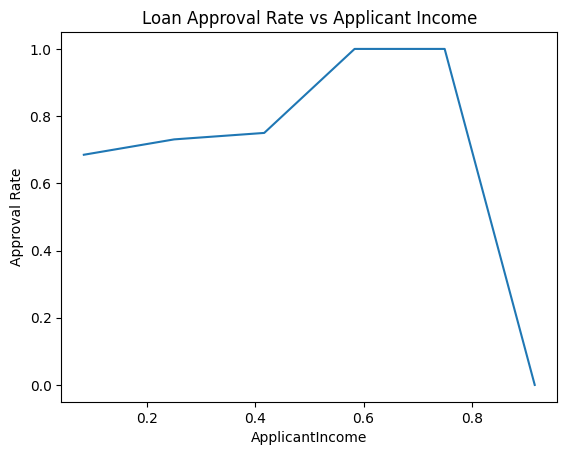

In [25]:
income_bins = pd.cut(df['ApplicantIncome'], bins=6)
approval_rate = df.groupby(income_bins)['Loan_Status'].apply(lambda x: (x=='Y').mean()).reset_index()
approval_rate['ApplicantIncome'] = approval_rate['ApplicantIncome'].apply(lambda x: x.mid)
sns.lineplot(data=approval_rate, x='ApplicantIncome', y='Loan_Status')
plt.title("Loan Approval Rate vs Applicant Income")
plt.ylabel("Approval Rate")
plt.show()